In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [2]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

/usr/local/lib/python3.7/dist-packages/traits/etsconfig/etsconfig.py:428: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


Notebook initialized with ipy backend.


In [39]:
GT, PRED = 0, 1

data_idx = 1

objects = dict()
pc_velo = dict()
calib = dict()
img = dict()
img_height, img_width = dict(), dict()

In [40]:
# Point cloud and 3D bounding box
def vis_pcd_and_3dbbox(mode):
    fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
    show_lidar_with_depth(pc_velo[mode], objects[mode], 
                          calib[mode], fig_3d, True, 
                          img_width[mode], img_height[mode])
    return fig_3d

# Point cloud and image
def vis_pcd_and_img(mode):
    img_lidar = show_lidar_on_image(pc_velo[mode][:, :3], 
                                    img[mode], calib[mode], 
                                    img_width[mode], img_height[mode])
    img_lidar = cv2.cvtColor(img_lidar, cv2.COLOR_BGR2RGB)

    fig_lidar = plt.figure(figsize=(14, 7))
    ax_lidar = fig_lidar.subplots()
    ax_lidar.imshow(img_lidar)
    plt.show()

# Image and bounding box
def vis_img_and_bbox(mode):
    img_bbox2d, img_bbox3d = show_image_with_boxes(img[mode], 
                                                   objects[mode], 
                                                   calib[mode])
    img_bbox2d = cv2.cvtColor(img_bbox2d, cv2.COLOR_BGR2RGB)

    fig_bbox2d = plt.figure(figsize=(14, 7))
    ax_bbox2d = fig_bbox2d.subplots()
    ax_bbox2d.imshow(img_bbox2d)
    plt.show()

# Image and 3D bounding box
def vis_img_and_3dbbox(mode):
    img_bbox2d, img_bbox3d = show_image_with_boxes(img[mode], 
                                                   objects[mode], 
                                                   calib[mode])
    img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

    fig_bbox3d = plt.figure(figsize=(14, 7))
    ax_bbox3d = fig_bbox3d.subplots()
    ax_bbox3d.imshow(img_bbox3d)
    plt.show()

# BEV point cloud and 3D bounding box
def vis_bev_pcd_and_3dbbox(mode):
    img_bev = show_lidar_topview_with_boxes(pc_velo[mode], 
                                            objects[mode], 
                                            calib[mode])

    fig_bev = plt.figure(figsize=(7, 14))
    ax_bev = fig_bev.subplots()
    ax_bev.imshow(img_bev)
    plt.show()

# Get ground truth and prediction data

In [41]:
# Ground truth
dataset_gt = kitti_object('/ws/data/kitti/', 'training', mode='gt')

objects[GT] = dataset_gt.get_label_objects(data_idx)
pc_velo[GT] = dataset_gt.get_lidar(data_idx)
calib[GT] = dataset_gt.get_calibration(data_idx)
img[GT] = dataset_gt.get_image(data_idx)
img_height[GT], img_width[GT], _ = img[GT].shape

# Prediction
parent_dir = '/ws/data2/ai28/EPNet/log/AI28v1_2/full_epnet_without_iou_branch'
eval_dir = 'eval_results/eval/eval_all_default/epoch_50/val/final_result'
dataset_pred = kitti_object('/ws/data/kitti/', 'training', mode='pred', parent_dir=parent_dir, eval_dir=eval_dir)

objects[PRED] = dataset_pred.get_label_objects(data_idx)
pc_velo[PRED] = dataset_pred.get_lidar(data_idx)
calib[PRED] = dataset_pred.get_calibration(data_idx)
img[PRED] = dataset_pred.get_image(data_idx)
img_height[PRED], img_width[PRED], _ = img[PRED].shape

/ws/data/kitti/ training
/ws/data/kitti/training/velodyne/000001.bin
/ws/data/kitti/ training
/ws/data/kitti/training/velodyne/000001.bin


# Visualize

## 1. Point cloud and 3D bounding box

In [42]:
gt_pcd_and_3dbbox = vis_pcd_and_3dbbox(GT)
gt_pcd_and_3dbbox

('All point num: ', 120268)
('FOV point num: ', (18630, 4))
pc_velo (18630, 4)
==================== (18630, 4)
box3d_pts_3d_velo:
[[75.90800262  0.80144598 -0.76353216]
 [75.8802278  -1.82825737 -0.79160924]
 [63.54158876 -1.69657531 -0.9191635 ]
 [63.56936358  0.93312804 -0.89108642]
 [75.8782218   0.77133472  2.08615335]
 [75.85044698 -1.85836863  2.05807627]
 [63.51180794 -1.72668657  1.93052201]
 [63.53958276  0.90301678  1.95859909]]
box3d_pts_3d_velo:
[[ 5.69368719e+01  1.56229867e+01 -1.70527840e+00]
 [ 5.69349438e+01  1.74928815e+01 -1.68554027e+00]
 [ 6.06247407e+01  1.74962787e+01 -1.64694393e+00]
 [ 6.06266688e+01  1.56263839e+01 -1.66668206e+00]
 [ 5.69194214e+01  1.56053426e+01 -3.54626794e-02]
 [ 5.69174933e+01  1.74752373e+01 -1.57245455e-02]
 [ 6.06072902e+01  1.74786345e+01  2.28717912e-02]
 [ 6.06092183e+01  1.56087398e+01  3.13365729e-03]]
box3d_pts_3d_velo:
[[47.141173   -4.29302253 -0.94797364]
 [47.12883762 -4.89286083 -0.95444076]
 [45.10937471 -4.85110879 -0.975

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

In [43]:
pred_pcd_and_3dbbox = vis_pcd_and_3dbbox(PRED)
pred_pcd_and_3dbbox

('All point num: ', 120268)
('FOV point num: ', (18630, 4))
pc_velo (18630, 4)
==================== (18630, 4)
box3d_pts_3d_velo:
[[60.88440147 17.16719238 -1.58470066]
 [60.62751512 15.58006506 -1.60415569]
 [56.93842694 16.17756178 -1.63639526]
 [57.19531328 17.7646891  -1.61694024]
 [60.8692958  17.1519191  -0.13926018]
 [60.61240946 15.56479178 -0.1587152 ]
 [56.92332127 16.1622885  -0.19095478]
 [57.18020761 17.74941583 -0.17149976]]
box3d_pts_3d_velo:
[[69.03006827  0.6293593  -0.81492632]
 [68.92215894 -1.37962042 -0.83728196]
 [63.5271305  -1.08924138 -0.89059472]
 [63.63503983  0.91973833 -0.86823908]
 [69.00490505  0.60391687  1.59290796]
 [68.89699572 -1.40506285  1.57055232]
 [63.50196728 -1.11468381  1.51723955]
 [63.60987661  0.8942959   1.53959519]]


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

## 2. Point cloud and image

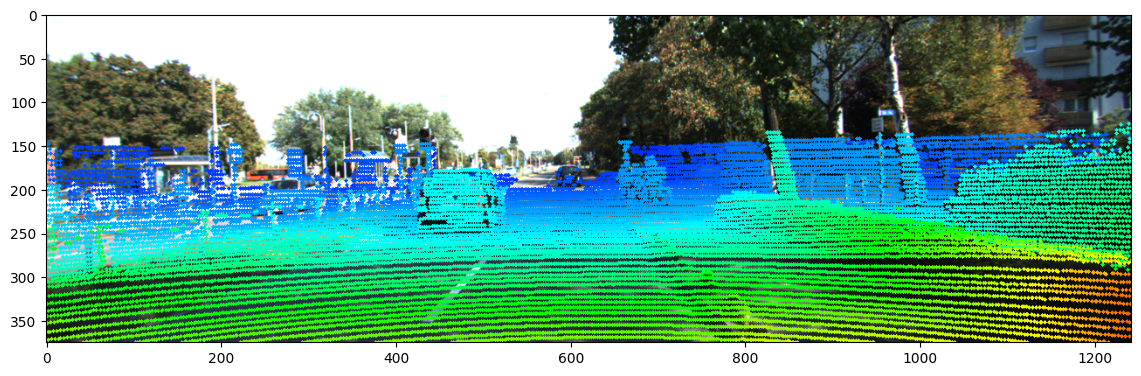

In [31]:
vis_pcd_and_img(GT)

## 3. Image and bounding box

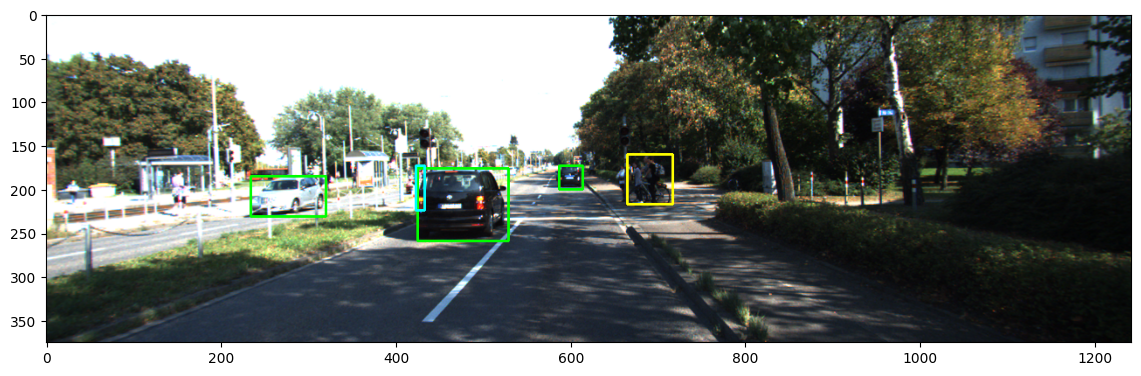

In [32]:
vis_img_and_bbox(GT)

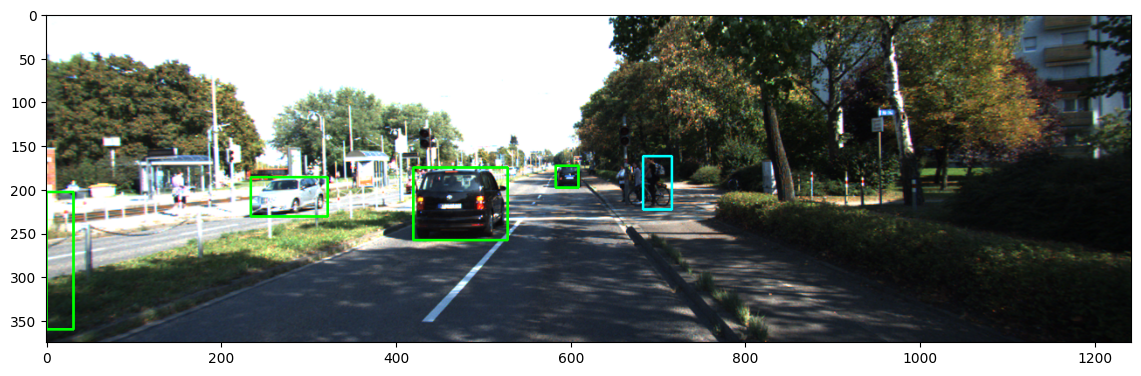

In [33]:
vis_img_and_bbox(PRED)

## 4. Image and 3D bounding box

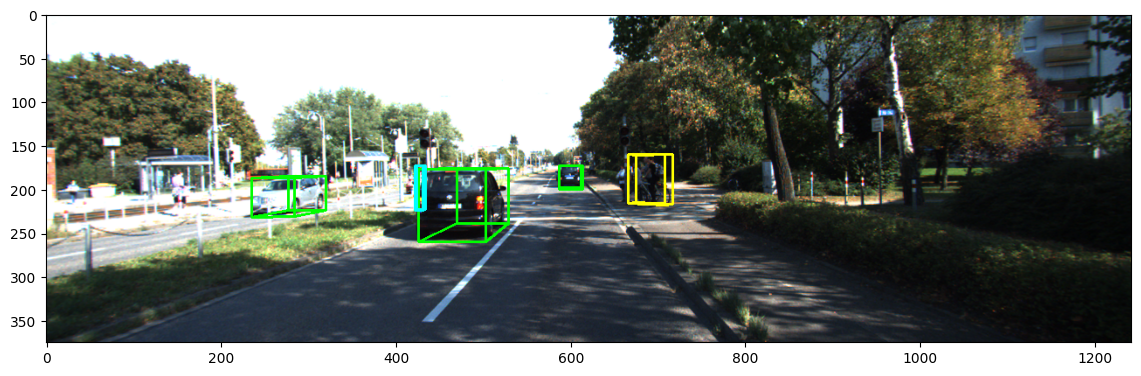

In [34]:
vis_img_and_3dbbox(GT)

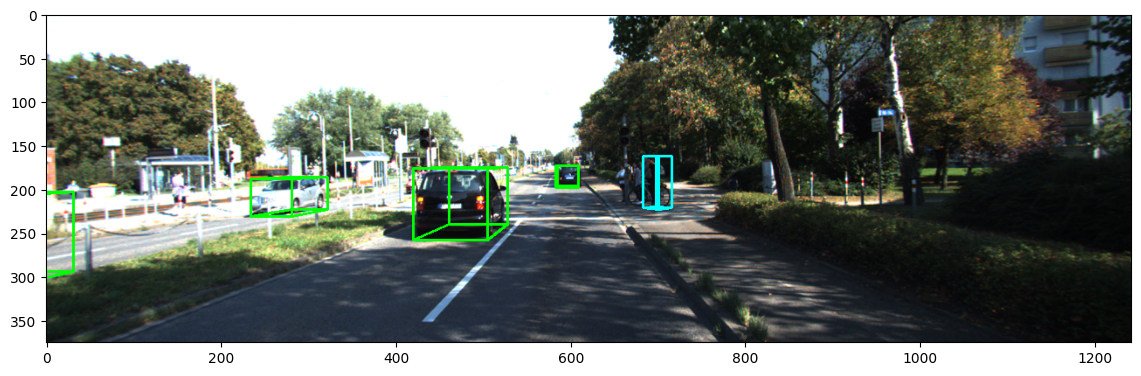

In [35]:
vis_img_and_3dbbox(PRED)

In [36]:
## 5. Bird-eye view point cloud and 3D bounding box

top_image: (500, 300, 3)


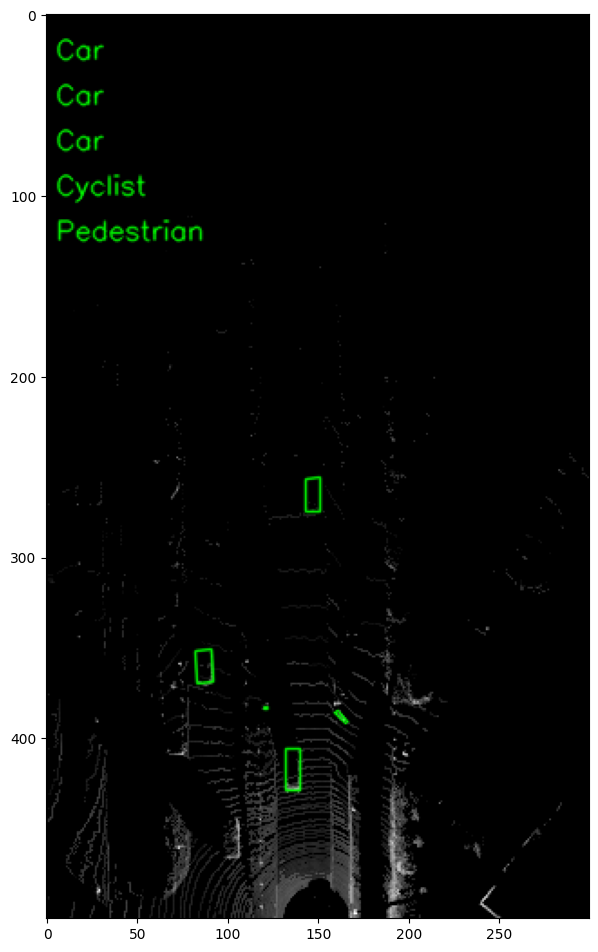

In [37]:
vis_bev_pcd_and_3dbbox(GT)

top_image: (500, 300, 3)


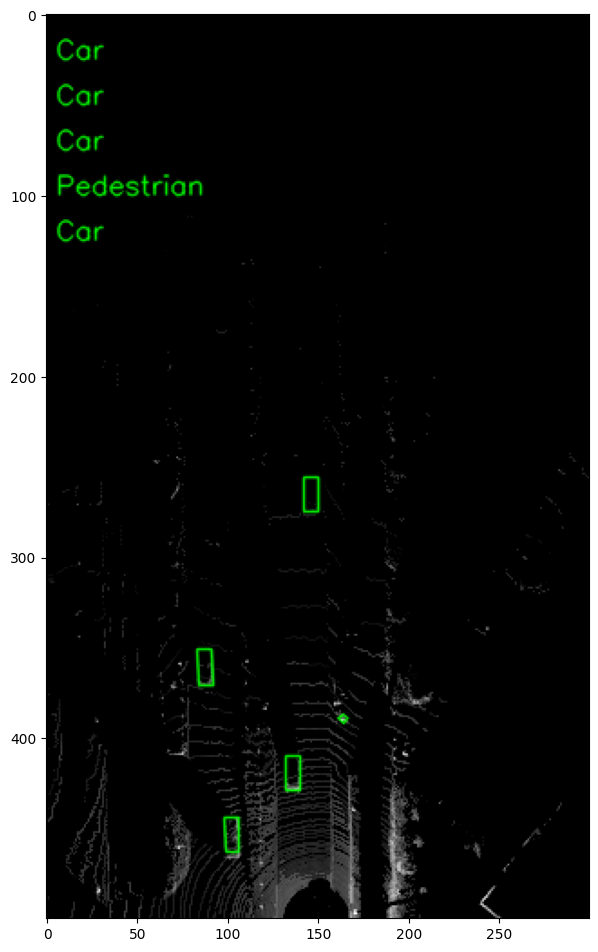

In [38]:
vis_bev_pcd_and_3dbbox(PRED)